In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
import collections
import seaborn as sns
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import r2_score

In [ ]:
train_dataset = pd.read_csv("/content/drive/My Drive/Colab Notebooks/train.csv")
test_dataset = pd.read_csv("/content/drive/My Drive/Colab Notebooks/test.csv")

In [ ]:
train_dataset

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,...,X345,X346,X347,X348,X349,X350,X351,X352,X353,X354,X355,X356,X357,X358,X359,X360,X361,X362,X363,X364,X365,X366,X367,X368,X369,X370,X371,X372,X373,X374,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,8405,107.39,ak,s,as,c,d,aa,d,q,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4205,8406,108.77,j,o,t,d,d,aa,h,h,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4206,8412,109.22,ak,v,r,a,d,aa,g,e,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4207,8415,87.48,al,r,e,f,d,aa,l,u,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [ ]:
test_dataset

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,...,X345,X346,X347,X348,X349,X350,X351,X352,X353,X354,X355,X356,X357,X358,X359,X360,X361,X362,X363,X364,X365,X366,X367,X368,X369,X370,X371,X372,X373,X374,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,3,az,v,as,f,d,a,j,j,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,1,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,4,az,l,n,f,d,z,l,n,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,5,w,s,as,c,d,y,i,m,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,8410,aj,h,as,f,d,aa,j,e,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4205,8411,t,aa,ai,d,d,aa,j,y,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4206,8413,y,v,as,f,d,aa,d,w,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4207,8414,ak,v,as,a,d,aa,c,q,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [ ]:
#check the dataset stats
train_dataset.describe()

,ID,y,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,...,X345,X346,X347,X348,X349,X350,X351,X352,X353,X354,X355,X356,X357,X358,X359,X360,X361,X362,X363,X364,X365,X366,X367,X368,X369,X370,X371,X372,X373,X374,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
count,4209.000000,4209.000000,4209.000000,4209.0,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,...,4209.000000,4209.000000,4209.0,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000
mean,4205.960798,100.669318,0.013305,0.0,0.075077,0.057971,0.428130,0.000475,0.002613,0.007603,0.007840,0.099549,0.142789,0.002613,0.086957,0.020670,0.001901,0.004989,0.682585,0.032549,0.043003,0.004514,0.232359,0.011167,0.000238,0.005464,0.232359,0.004514,0.232359,0.033262,0.000238,0.000713,0.011404,0.000238,0.072226,0.011404,0.253267,0.597292,0.012830,0.022333,...,0.022333,0.047517,0.0,0.947256,0.044904,0.338798,0.297220,0.054170,0.002138,0.202899,0.380375,0.179853,0.001188,0.426942,0.031837,0.076503,0.966025,0.520314,0.753861,0.002851,0.002851,0.001188,0.051794,0.062723,0.000475,0.006652,0.014255,0.000475,0.019244,0.227370,0.318841,0.057258,0.314802,0.020670,0.009503,0.008078,0.007603,0.001663,0.000475,0.001426
std,2437.608688,12.679381,0.114590,0.0,0.263547,0.233716,0.494867,0.021796,0.051061,0.086872,0.088208,0.299433,0.349899,0.051061,0.281805,0.142294,0.043561,0.070467,0.465526,0.177475,0.202888,0.067043,0.422387,0.105093,0.015414,0.073729,0.422387,0.067043,0.422387,0.179341,0.015414,0.026691,0.106192,0.015414,0.258893,0.106192,0.434934,0.490501,0.112552,0.147782,...,0.147782,0.212768,0.0,0.223549,0.207117,0.473357,0.457089,0.226379,0.046198,0.402205,0.485537,0.384110,0.034450,0.494693,0.175586,0.265832,0.181186,0.499647,0.430812,0.053325,0.053325,0.034450,0.221637,0.242492,0.021796,0.081300,0.118555,0.021796,0.137399,0.419183,0.466082,0.232363,0.464492,0.142294,0.097033,0.089524,0.086872,0.040752,0.021796,0.037734
min,0.000000,72.110000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2095.000000,90.820000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000

In [ ]:
test_dataset.describe()

,ID,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,...,X345,X346,X347,X348,X349,X350,X351,X352,X353,X354,X355,X356,X357,X358,X359,X360,X361,X362,X363,X364,X365,X366,X367,X368,X369,X370,X371,X372,X373,X374,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
count,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,...,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.0,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000
mean,4211.039202,0.019007,0.000238,0.074364,0.061060,0.427893,0.000713,0.002613,0.008791,0.010216,0.111665,0.139463,0.001663,0.082442,0.020195,0.002376,0.009028,0.681159,0.026847,0.038964,0.005464,0.237349,0.010454,0.000713,0.003564,0.237349,0.002851,0.237349,0.031124,0.000713,0.001901,0.011404,0.001426,0.076978,0.006890,0.252079,0.593728,0.011167,0.023759,0.133523,...,0.024709,0.044904,0.000475,0.950107,0.041815,0.341174,0.287242,0.050131,0.002613,0.203849,0.377762,0.184129,0.002376,0.433595,0.036826,0.079591,0.962461,0.517938,0.745308,0.003564,0.003326,0.001663,0.048230,0.063198,0.0,0.005702,0.011404,0.000238,0.014493,0.235923,0.325968,0.049656,0.311951,0.019244,0.011879,0.008078,0.008791,0.000475,0.000713,0.001663
std,2423.078926,0.136565,0.015414,0.262394,0.239468,0.494832,0.026691,0.051061,0.093357,0.100570,0.314992,0.346470,0.040752,0.275070,0.140683,0.048691,0.094599,0.466082,0.161656,0.193532,0.073729,0.425508,0.101720,0.026691,0.059598,0.425508,0.053325,0.425508,0.173673,0.026691,0.043561,0.106192,0.037734,0.266588,0.082729,0.434258,0.491195,0.105093,0.152314,0.340180,...,0.155255,0.207117,0.021796,0.217750,0.200190,0.474160,0.452529,0.218240,0.051061,0.402906,0.484885,0.387636,0.048691,0.495630,0.188356,0.270692,0.190100,0.499738,0.435740,0.059598,0.057584,0.040752,0.214277,0.243347,0.0,0.075305,0.106192,0.015414,0.119525,0.424625,0.468791,0.217258,0.463345,0.137399,0.108356,0.089524,0.093357,0.021796,0.026691,0.040752
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2115.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000

In [ ]:
checklist=list(train_dataset.isna().any())
l=[]
for i in checklist:
  if i == True:
    l.append(i)
print("[i] Train data: number of columns with Na: ",len(l))
checklist=list(train_dataset.isnull().any())
l=[]
for i in checklist:
  if i == True:
    l.append(i)
print("[i] Train data: number of columns with Null: ",len(l))
#
checklist=list(test_dataset.isna().any())
l=[]
for i in checklist:
  if i == True:
    l.append(i)
print("[i] Test data: number of columns with Na: ",len(l))
checklist=list(test_dataset.isnull().any())
l=[]
for i in checklist:
  if i == True:
    l.append(i)
print("[i] Test data: number of columns with Null: ",len(l))

[i] Train data: number of columns with Na:  0
[i] Train data: number of columns with Null:  0
[i] Test data: number of columns with Na:  0
[i] Test data: number of columns with Null:  0


 ***Drop columns with zero variance***

In [ ]:
#identify all columns with zero variance
def get_null_variance(df):
  var_cols= df.var()
  #returns a series object with columns as index and variance as values
  del_list = var_cols[var_cols == 0].index
  return del_list

In [ ]:
#Drop identified columns and check
train_dataset.drop(get_null_variance(train_dataset),axis = 1, inplace= True)
test_dataset.drop(get_null_variance(test_dataset),axis = 1, inplace= True)

In [ ]:
# check if columns were dropped 
print(get_null_variance(train_dataset))
#returns empty array if zero variance columns not found
print(get_null_variance(test_dataset))

Index([], dtype='object')
Index([], dtype='object')


Observing values in the dataset. At first glance it seems like the column ID could just be a sequential serial. Its max values are greater than that of serial values. However this could also be the case if the dataset was obtained from a train test split .

In [ ]:
# to check if id is a result of a train test split
# we test if ID values missing in train are found in test and vice versa
tmax=train_dataset['ID'].max()
tsmax=test_dataset['ID'].max()
if tmax == tsmax:
  print("tmax = tsmax")
elif tmax > tsmax:
  print("tmax > tsmax")
else:
  print("tmax < tsmax")
#Establishes that test data is large.
#which may suggest train test split has occured 
#Check if ID in test is repeated in train
#if yes then we keep ID else we disregard it
count = 0
for i in train_dataset['ID'].unique():
  if i in test_dataset['ID'].unique():
    count = count + 1
print("{} / {} values found in test data".format(count, len(test_dataset['ID'])))

tmax > tsmax
0 / 4209 values found in test data


In [ ]:
#Above test is suggestive of the data being subject to train test split 
#A histogram of target values is plotted. In accordance with the central limit theorem
#it is suggestive that train and test data arise from a single set 
#Drop ID column since it doesn't add information
train_dataset.drop('ID', axis = 1, inplace = True)
test_dataset.drop('ID', axis = 1, inplace = True)
print (train_dataset.columns)

Index(['y', 'X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8', 'X10',
       ...
       'X375', 'X376', 'X377', 'X378', 'X379', 'X380', 'X382', 'X383', 'X384',
       'X385'],
      dtype='object', length=365)


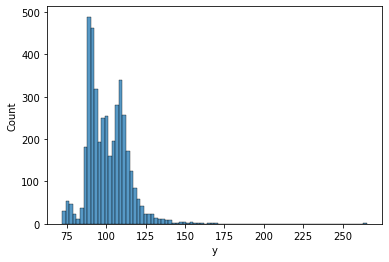

In [ ]:
sns.histplot(train_dataset['y'])

**Apply Label Encoder** 

In [ ]:
# Look at unique values
for cols in train_dataset.columns:
  print(cols,train_dataset[cols].unique())
# identify character columns to encode
label_cols = []
for cols in train_dataset.columns:
  print ("{}: {}".format(cols,train_dataset[cols].dtype), end=" ")
  if train_dataset[cols].dtype == "object":
    label_cols.append(cols)

y [130.81  88.53  76.26 ...  85.71 108.77  87.48]
X0 ['k' 'az' 't' 'al' 'o' 'w' 'j' 'h' 's' 'n' 'ay' 'f' 'x' 'y' 'aj' 'ak' 'am'
 'z' 'q' 'at' 'ap' 'v' 'af' 'a' 'e' 'ai' 'd' 'aq' 'c' 'aa' 'ba' 'as' 'i'
 'r' 'b' 'ax' 'bc' 'u' 'ad' 'au' 'm' 'l' 'aw' 'ao' 'ac' 'g' 'ab']
X1 ['v' 't' 'w' 'b' 'r' 'l' 's' 'aa' 'c' 'a' 'e' 'h' 'z' 'j' 'o' 'u' 'p' 'n'
 'i' 'y' 'd' 'f' 'm' 'k' 'g' 'q' 'ab']
X2 ['at' 'av' 'n' 'e' 'as' 'aq' 'r' 'ai' 'ak' 'm' 'a' 'k' 'ae' 's' 'f' 'd'
 'ag' 'ay' 'ac' 'ap' 'g' 'i' 'aw' 'y' 'b' 'ao' 'al' 'h' 'x' 'au' 't' 'an'
 'z' 'ah' 'p' 'am' 'j' 'q' 'af' 'l' 'aa' 'c' 'o' 'ar']
X3 ['a' 'e' 'c' 'f' 'd' 'b' 'g']
X4 ['d' 'b' 'c' 'a']
X5 ['u' 'y' 'x' 'h' 'g' 'f' 'j' 'i' 'd' 'c' 'af' 'ag' 'ab' 'ac' 'ad' 'ae'
 'ah' 'l' 'k' 'n' 'm' 'p' 'q' 's' 'r' 'v' 'w' 'o' 'aa']
X6 ['j' 'l' 'd' 'h' 'i' 'a' 'g' 'c' 'k' 'e' 'f' 'b']
X8 ['o' 'x' 'e' 'n' 's' 'a' 'h' 'p' 'm' 'k' 'd' 'i' 'v' 'j' 'b' 'q' 'w' 'g'
 'y' 'l' 'f' 'u' 'r' 't' 'c']
X10 [0 1]
X12 [0 1]
X13 [1 0]
X14 [0 1]
X15 [0 1]
X16 [0 1]
X17 [0 1]


In [ ]:
#these columns need to be label encoded 
label_cols

['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8']

In [ ]:
#apply label encoder to the dataframe
encoder_dict = collections.defaultdict(LabelEncoder)
labeled_df_cols = train_dataset[label_cols].apply(lambda x: encoder_dict[x.name].fit_transform(x))
#Replace existing dataset with labels for columns 
train_dataset.drop(['X257', 'X295', 'X296', 'X369', 'X258'],axis= 1, inplace=True)
for i in label_cols:
  train_dataset[i] = labeled_df_cols[i]
df=train_dataset
labeled_df_cols = test_dataset[label_cols].apply(lambda x: encoder_dict[x.name].fit_transform(x))
for i in label_cols:
  test_dataset[i] = labeled_df_cols[i]
#balance dimensions
p= list(train_dataset.columns)
p.remove('y')
test_dataset = test_dataset[p]

In [ ]:
#since we have a lot of features  check correlation for a better understanding
df.corr()

,y,X0,X1,X2,X3,X4,X5,X6,X8,X10,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,...,X343,X344,X345,X346,X348,X349,X350,X351,X352,X353,X354,X355,X356,X357,X358,X359,X360,X361,X362,X363,X364,X365,X366,X367,X368,X370,X371,X372,X373,X374,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
y,1.000000,-0.187081,-0.003032,0.078852,-0.150741,-0.015272,-0.039031,0.004252,0.003328,-0.026985,0.089792,0.048276,0.193643,0.023116,0.048946,-0.159815,-0.001789,-0.168895,-0.095148,0.031111,-0.094320,-0.078676,-0.003526,-0.021173,-0.053483,-0.250288,-0.379629,-0.043247,-0.086976,0.001750,-0.014664,0.061151,-0.086976,-0.016999,-0.086976,0.012614,-0.014664,-0.000918,0.012932,-0.007076,...,0.119881,0.066875,-0.012638,0.092991,-0.238914,0.099188,-0.103096,0.073174,0.096487,0.022267,0.133294,0.124188,-0.019163,-0.016526,-0.020961,-0.014465,0.129839,0.022974,-0.039556,0.108564,0.001008,0.001008,-0.001777,0.100708,0.101059,0.056700,-0.215375,-0.036545,-0.058952,0.015378,0.029100,0.114005,0.061403,-0.258679,0.067919,0.040932,-0.159815,0.040291,-0.004591,-0.022280
X0,-0.187081,1.000000,-0.271123,-0.139904,-0.070645,0.017988,0.012293,0.037549,0.047735,0.081122,-0.134577,-0.130529,-0.138310,0.011491,0.003940,-0.060401,-0.036495,0.203244,0.030838,-0.025532,0.147904,0.115098,0.001554,-0.006131,0.050622,-0.100412,-0.149090,0.062321,0.120973,0.094024,0.012613,0.037187,0.120973,0.044776,0.120973,-0.010562,0.012613,-0.010552,-0.008554,-0.026665,...,0.050892,-0.122156,0.004856,-0.049686,0.170687,-0.023534,-0.106772,-0.144929,-0.037934,-0.042253,-0.182165,0.132281,0.159288,0.015664,-0.331767,-0.024918,-0.212191,-0.021215,0.417100,-0.235644,-0.040265,-0.040265,0.010643,-0.054229,-0.081594,0.050787,-0.085449,-0.015493,0.021198,-0.161102,0.113272,0.070546,0.045173,-0.102136,0.083352,-0.038618,-0.060401,-0.011174,0.009110,0.011660
X1,-0.003032,-0.271123,1.000000,0.088266,0.205657,-0.020724,0.046417,-0.079119,-0.000306,-0.137193,0.112263,0.286683,0.079784,-0.023295,-0.005591,0.120044,0.068924,-0.207605,0.030153,0.069149,-0.129648,-0.011723,-0.022323,-0.004501,-0.048785,0.127520,0.202989,0.035667,-0.092994,-0.004861,0.021482,-0.051615,-0.092994,-0.024995,-0.092994,0.078145,0.021482,-0.021229,0.018769,-0.018278,...,-0.067608,0.107954,0.007790,-0.039632,-0.060908,-0.035300,0.152362,0.157290,-0.046500,-0.010867,0.177373,-0.332577,-0.407207,0.048057,0.492712,0.124822,0.240327,0.244337,-0.553714,0.209735,0.026452,0.026452,-0.003694,-0.045593,-0.052381,0.097932,0.079697,0.029105,-0.123914,0.202307,0.056874,-0.102424,-0.248791,0.145282,0.070753,-0.022360,0.120044,-0.029253,0.017603,0.008356
X2,0.078852,-0.139904,0.088266,1.000000,-0.093546,0.002289,-0.017722,0.065778,-0.069932,0.042398,0.131464,0.222132,-0.079183,-0.001613,-0.020227,0.024392,-0.060337,-0.312393,-0.494692,-0.018519,0.444380,0.115886,-0.008234,0.030495,0.137151,0.280952,0.209387,-0.076038,0.110163,-0.168747,-0.001848,0.079531,0.110163,0.158753,0.110163,0.003780,-0.001848,-0.003202,-0.012875,0.005224,...,0.003962,0.060595,-0.137912,-0.034358,-0.320180,-0.046940,-0.230941,0.065231,-0.048432,-0.005549,0.099700,-0.065141,0.017311,-0.004134,-0.020174,-0.015778,0.185954,0.095281,-0.121228,-0.086462,0.018530,0.018530,-0.005400,-0.044346,0.084253,0.170400,0.175921,0.033397,-0.102637,-0.036632,-0.174308,0.033697,0.122503,0.131974,0.033645,0.006473,0.024392,-0.019873,-0.002614,-0.004529
X3,-0.150741,-0.070645,0.205657,-0.093546,1.000000,0.015298,-0.008161,-0.048468,-0.001249,0.019663,0.056166,-0.216464,0.045183,-0.024059,-0.008337,-0.046271,-0.028413,-0.068126,0.073098,-0.032411,-0.188833,0.055659,-0.048153,-0.041311,-0.049081,0.162385,0.188854,0.078486,-0.080666,-0.082171,-0.008149,-0.020661,-0.080666,0.001071,-0.080666,0.023032,-0.008149,0.021701,0.055119,0.027295,...,-0.112025,-0.062449,0.178881,-0.202812,0.116191,-0.197058,0.143553,0.077231,-0.207965,-0.024472,-0.071795,-0.189158,-0.392994,0.041239,0.196666,0.037152,-0.117218,-0.209929,-0.208063,0.0

In [ ]:
#Create features and responses
features_cols = list(df.columns)
features_cols.remove('y')
xdf = df[features_cols]
ydf = df['y']

In [ ]:
xdf

,X0,X1,X2,X3,X4,X5,X6,X8,X10,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,...,X343,X344,X345,X346,X348,X349,X350,X351,X352,X353,X354,X355,X356,X357,X358,X359,X360,X361,X362,X363,X364,X365,X366,X367,X368,X370,X371,X372,X373,X374,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,32,23,17,0,3,24,9,14,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,32,21,19,4,3,28,11,14,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,20,24,34,2,3,27,9,23,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1,...,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,20,21,34,5,3,27,11,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1,...,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,20,23,34,5,3,12,3,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1,...,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,8,20,16,2,3,0,3,16,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4205,31,16,40,3,3,0,7,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4206,8,23,38,0,3,0,6,4,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4207,9,19,25,5,3,0,11,20,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [ ]:
ydf

0       130.81
1        88.53
2        76.26
3        80.62
4        78.02
         ...  
4204    107.39
4205    108.77
4206    109.22
4207     87.48
4208    110.85
Name: y, Length: 4209, dtype: float64

There seems to be correlation among the features themselves, dimensionality reduction may prove helpful



In [ ]:
#SVD is a good choice when dealing with sparce matrix
svd = TruncatedSVD(18)
svd.fit(xdf)
x=svd.transform(xdf)
xtest = svd.transform(test_dataset)
#verify svd

In [ ]:
xtest.shape

(4209, 18)

XGBoost Regressor

In [ ]:
train_acc=[]
test_acc=[]
xtrain,xvalid,ytrain,yvalid = train_test_split(x,ydf,random_state=44)
model = xgb.XGBRegressor(colsample_bytree=1,
                 gamma=3,                 
                 learning_rate=0.8,
                 max_depth=4,
                 n_estimators=80,
                 min_child_weight=1,
                 reg_alpha=0.2,
                 reg_lambda=40,
                 subsample=0.82,
                 seed=4000) 
model.fit(xtrain, ytrain)
y_pred= model.predict(xtrain)
r2 = r2_score(y_pred, ytrain)
train_acc.append(r2)
y_pred= model.predict(xvalid)
r2 = r2_score(y_pred, yvalid)
test_acc.append(r2)
print("Testing R2: ",max(test_acc))
print("Training R2: ",train_acc[test_acc.index(max(test_acc))])

[19:45:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Testing R2:  0.11470566578132713
Training R2:  0.8115282170669326


*** Predict values using the model***

In [ ]:
 
Yp = model.predict(xtest)
Yp

array([ 85.84151 ,  94.39124 ,  72.58978 , ...,  98.44936 , 108.87911 ,
        97.203156], dtype=float32)

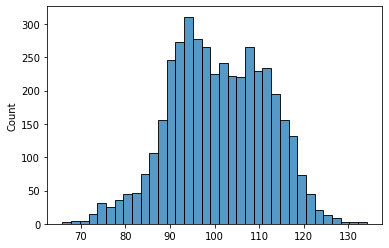

In [ ]:
 sns.histplot(Yp)